# Richard Albright
## ISYE-6740
## HW 2
## Fall 2020

In [31]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings
import networkx as nx
from joblib import Memory
from scipy.io import loadmat
from scipy.spatial.distance import cdist
import scipy.sparse.linalg as ll
from PIL import Image
import glob

warnings.filterwarnings('ignore')

# Question 1: Food consumption in European Countries

## 1.1

The columns represent the food item which are represented by the vector $X^{m}$, and the rows correspond to the countries $X^{m}_{i}$.

In [32]:
df = pd.read_csv('data/food-consumption.csv')
df.set_index(['Country'], inplace=True)
df

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,90,49,88,19,57,51,19,21,27,21,81,75,44,71,22,91,85,74,30,26
Italy,82,10,60,2,55,41,3,2,4,2,67,71,9,46,80,66,24,94,5,18
France,88,42,63,4,76,53,11,23,11,5,87,84,40,45,88,94,47,36,57,3
Holland,96,62,98,32,62,67,43,7,14,14,83,89,61,81,15,31,97,13,53,15
Belgium,94,38,48,11,74,37,23,9,13,12,76,76,42,57,29,84,80,83,20,5
Luxembourg,97,61,86,28,79,73,12,7,26,23,85,94,83,20,91,94,94,84,31,24
England,27,86,99,22,91,55,76,17,20,24,76,68,89,91,11,95,94,57,11,28
Portugal,72,26,77,2,22,34,1,5,20,3,22,51,8,16,89,65,78,92,6,9
Austria,55,31,61,15,29,33,1,5,15,11,49,42,14,41,51,51,72,28,13,11


## 1.2

## 1.3

In [33]:
def pca(X, k=2):
    Xm = np.mean(X,axis=0)
    m, n = X.shape
    Xc = X - Xm
    u, sigma, vt = np.linalg.svd(Xc, full_matrices=False)
    w = vt[:k, :].T
    z = []
    for i in range(k):
        dim  = Xc.dot(w[:, i]) / np.sqrt(sigma[i])
        z.append(dim)
    z = np.array(z).T
    return z, w

w1: [0.03468684 0.12855665 0.26380563 0.12831501 0.19272266 0.08259391
 0.28736279 0.06178206 0.09932528 0.14744931 0.12598819 0.0453415
 0.29809045 0.33596702 0.56607817 0.10377258 0.16360858 0.33173837
 0.00285563 0.21574694]
w2: [0.1964172  0.49470786 0.00498578 0.0025282  0.17557523 0.25949092
 0.15755102 0.02742506 0.14178443 0.06602619 0.25239852 0.14881338
 0.33973568 0.09349624 0.29672554 0.10793775 0.00480177 0.24008316
 0.23945811 0.37913341]


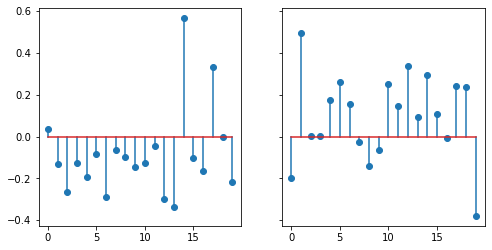

In [34]:
k=2
X = df.to_numpy()
zs, w = pca(X, k=k)
w1 = np.abs(w[:, 0])
w2 = np.abs(w[:, 1])
print(f"w1: {w1}")
print(f"w2: {w2}")
fig, axs = plt.subplots(1, k, sharex=True, sharey=True,
figsize=(4*k, 4))
m, n = X.shape
for i in range(k):
    axs[i].stem(np.arange(max(m, n)), (w[:, i]))

## 1.4

(-6.736656927701792, 7.070318562153433, -5.7586147676218, 8.048360722233426)

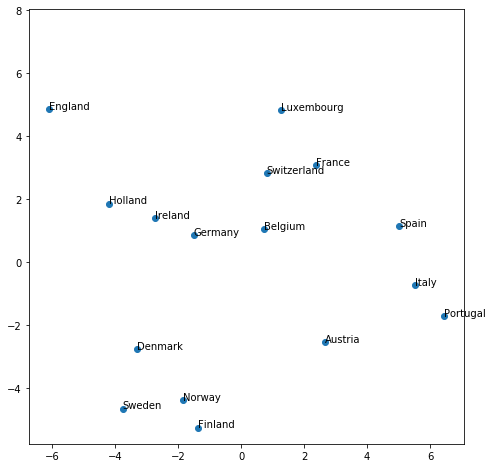

In [35]:
foods = df.columns.to_list()
countries = df.index.to_list()

fig = plt.figure(figsize=(8, 8))
plt.scatter(zs[:,0], zs[:,1])
for x, y, label in zip(zs[:, 0], zs[:, 1], countries):
    plt.annotate(label, xy=(x, y))
ax = plt.axes()
ax.axis('square')

## 1.5

w1: [0.28008166 0.2750229  0.26859917 0.24424423 0.29112577 0.30589322
 0.21873048 0.24595137 0.19355131 0.21413654 0.14536191 0.26356076
 0.26500824 0.27149556 0.2036458  0.26102527]
w2: [0.06929602 0.33328461 0.21731844 0.26088316 0.0557977  0.24557537
 0.34803754 0.3806867  0.06126789 0.11594374 0.27574194 0.2514137
 0.20682252 0.19469827 0.35743592 0.27290362]


(-7.236938839949937, 8.27116295417133, -10.638769986662197, 4.869331807459071)

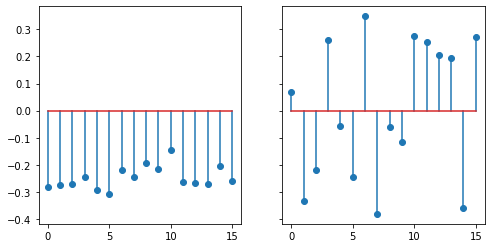

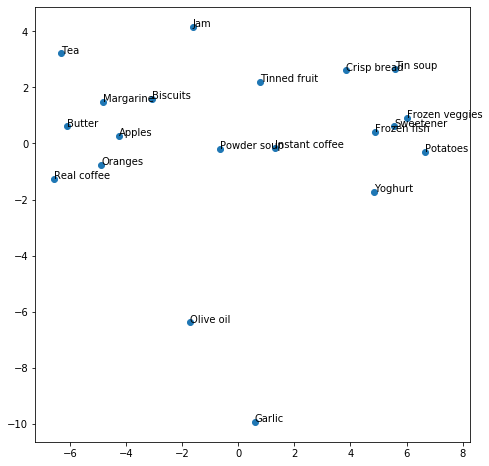

In [36]:
df = pd.read_csv('data/food-consumption.csv')
df.set_index(['Country'], inplace=True)
df = df.transpose()
X = df.to_numpy()
zs, w = pca(X, k=k)
w1 = np.abs(w[:, 0])
w2 = np.abs(w[:, 1])
print(f"w1: {w1}")
print(f"w2: {w2}")
fig, axs = plt.subplots(1, k, sharex=True, sharey=True,
figsize=(4*k, 4))
m, n = X.shape
for i in range(k):
    axs[i].stem(np.arange(min(m, n)), (w[:, i]))
    
countries = df.columns.to_list()
foods = df.index.to_list()

fig = plt.figure(figsize=(8, 8))
plt.scatter(zs[:, 0], zs[:, 1])
for x, y, label in zip(zs[:, 0], zs[:, 1], foods):
    plt.annotate(label, xy=(x, y))
ax = plt.axes()
ax.axis('square')

# Question 2: Order of faces using ISOMAP

## a. Visualize the similarity graph

In [37]:
cache_dir = "data/cache"
memory = Memory(cache_dir, verbose=0)

@memory.cache
def Matrix_D(W):
    # Generate Graph and Obtain Matrix D, \\
    # from weight matrix W defining the weight on the edge between each pair of nodes.
    # Note that you can assign sufficiently large weights to non-existing edges.

    n = np.shape(W)[0]
    Graph = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            Graph.add_weighted_edges_from([(i,j,min(W[i,j], W[j,i]))])

    res = dict(nx.all_pairs_dijkstra_path_length(Graph))
    D = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            D[i,j] = res[i][j]
    np.savetxt('data/D.csv', D)
    return D

In [38]:
images = loadmat('data/isomap.mat')['images']
images = images
n, m = images.shape

X = images.T


In [39]:
def create_adjacency_matrix(X, knn=100, distance='euclidean'):
    epsilon = 0.1
    n, m = X.shape
    dist_mtx = cdist(X, X, metric=distance)
    adj_mtx =  np.zeros((n, n))
    min_neighbors = False
    while not min_neighbors:
        islocal = dist_mtx < epsilon
        neighbors = np.mean(np.sum(islocal, axis=0))
        min_row = np.min(np.sum(islocal, axis=0))
        if knn <= neighbors and min_row > 0:
            min_neighbors = True
        epsilon += 0.1
    print(f"Epsilon = {epsilon} with min neighbors of {min_row} and mean neighbors of {neighbors}")

    for i in range(islocal.shape[0]):
        for j in range(islocal.shape[0]):
            if islocal[i, j] == True:
                adj_mtx[i, j] = dist_mtx[i, j]

    wgt_adj_mtx = adj_mtx
    return wgt_adj_mtx

In [40]:
wgt_adj_mtx = create_adjacency_matrix(X)

Epsilon = 14.899999999999963 with min neighbors of 12 and mean neighbors of 100.17765042979943


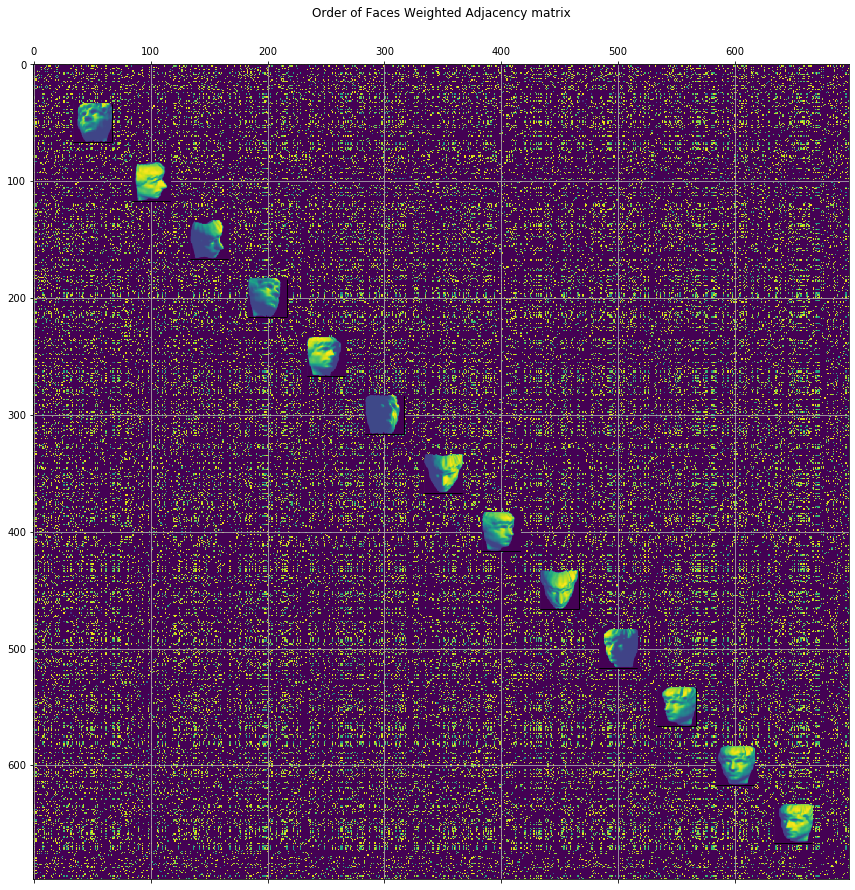

In [41]:
fig, ax = plt.subplots(figsize=(15,15))
cax = ax.matshow(wgt_adj_mtx, interpolation='nearest')
ax.grid(True)
plt.title('Order of Faces Weighted Adjacency matrix')
selected_image_idx = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
for i in selected_image_idx:
    single_image = images[:, i].reshape(64, 64).T

    imagebox = OffsetImage(single_image, zoom=0.6)
    ab = AnnotationBbox(imagebox, [i,i], pad=0)
    ax.add_artist(ab)
plt.savefig('data/HW2_Q2a.png')

# b. Implement the ISOMAP algorithm yourself

In [42]:
def isomap(X, k=2, distance='euclidean'):
    wgt_adj_mtx = create_adjacency_matrix(X, distance=distance)
    wgt_adj_mtx[wgt_adj_mtx == 0] = np.inf
    D = Matrix_D(wgt_adj_mtx)
    n, m = D.shape
    I = np.eye(m)
    IIT = np.ones([m, m])
    H = I - (1/m) * IIT
    D2 = D**2
    C = -0.5 * H.dot(D2).dot(H)
    u, sigma, vt = np.linalg.svd(C, full_matrices=False)
    # print(f"u: {u.shape}, sigma: {sigma.shape}, vt: {vt.shape}")
    w = vt[:k, :].T
    dims = []
    for i in range(k):
        dim  = C.dot(w[:, i]) / np.sqrt(sigma[i])
        dims.append(dim)
    dims = np.array(dims).T
    return dims

In [43]:
def plot_images(images, z, saveas=None):
    fig, ax = plt.subplots(figsize=(15,15))
    plt.scatter(z[:, 0], z[:, 1])
    plt.axis('tight')
    ax.set_xlabel('Component: 1')
    ax.set_ylabel('Component: 2')
    n, m = images.shape
    for idx in range(0, m, 20):
        single_image = images[:, idx].reshape(64, 64).T
        imagebox = OffsetImage(single_image, zoom=0.6)
        ab = AnnotationBbox(imagebox, [z[idx, 0], z[idx, 1]], pad=0)
        ax.add_artist(ab)
    if saveas is not None:
        plt.savefig(saveas) 

Epsilon = 14.899999999999963 with min neighbors of 12 and mean neighbors of 100.17765042979943


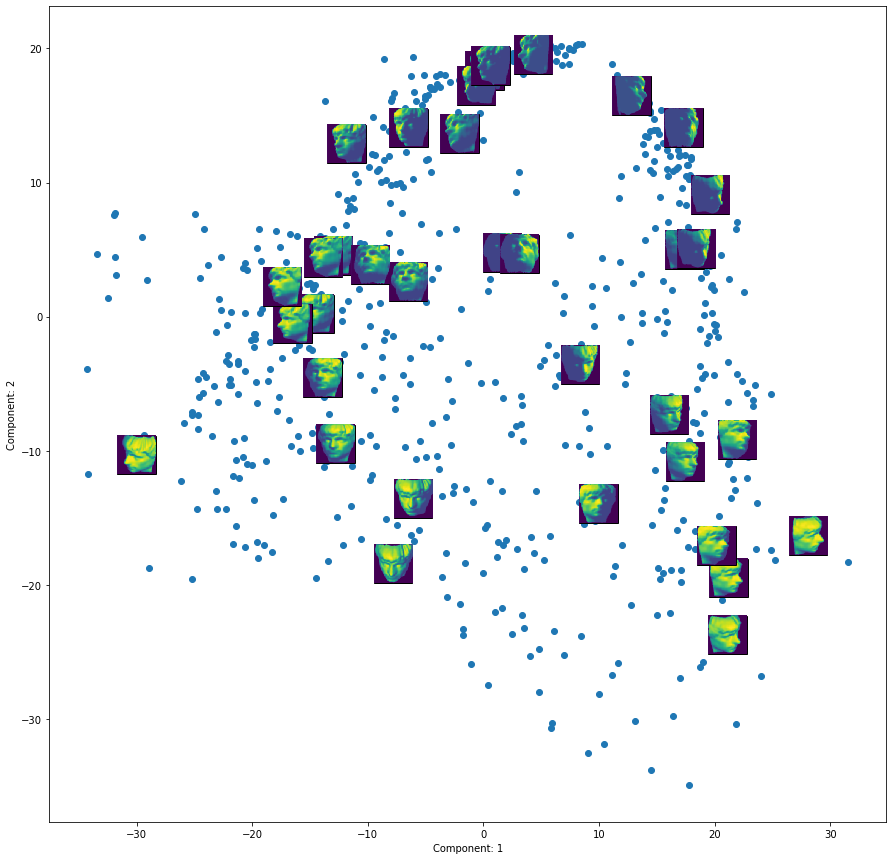

In [44]:
z = isomap(X)
plot_images(images, z, saveas='data/HW2_Q2b.png')

## c. Now choose L1 distance (or Manhattan distance) between images

Epsilon = 624.2000000000734 with min neighbors of 12 and mean neighbors of 100.01146131805157


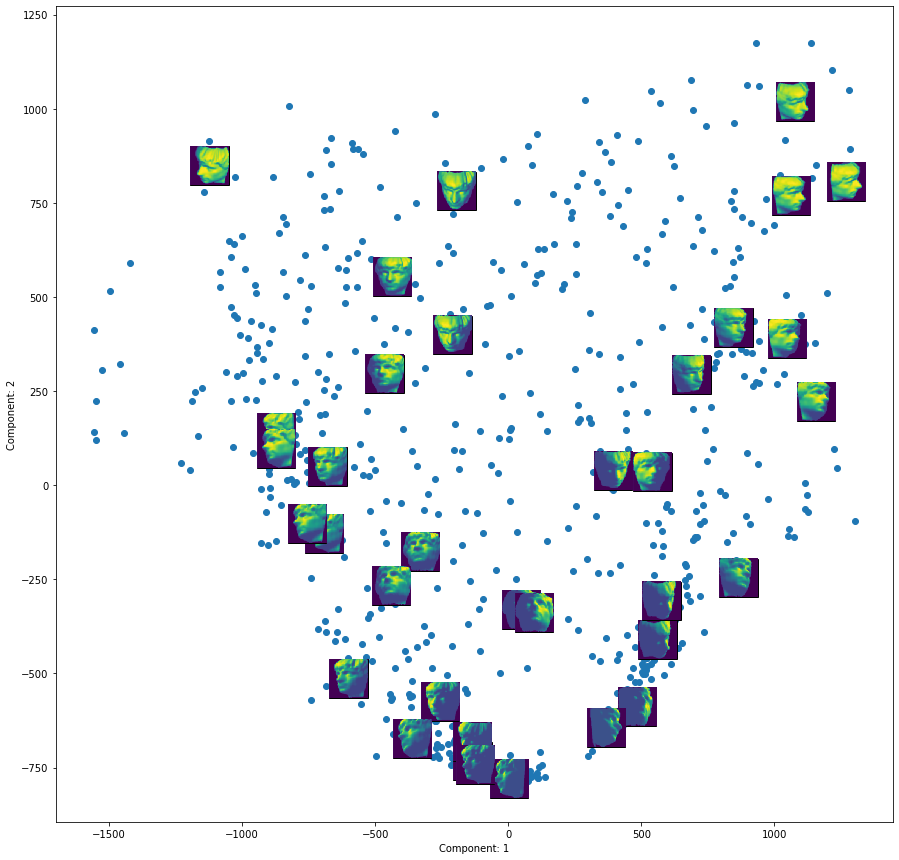

In [45]:
z2 = isomap(X, distance='cityblock')
plot_images(images, z2, saveas='data/HW2_Q2c.png')

## d. Perform PCA

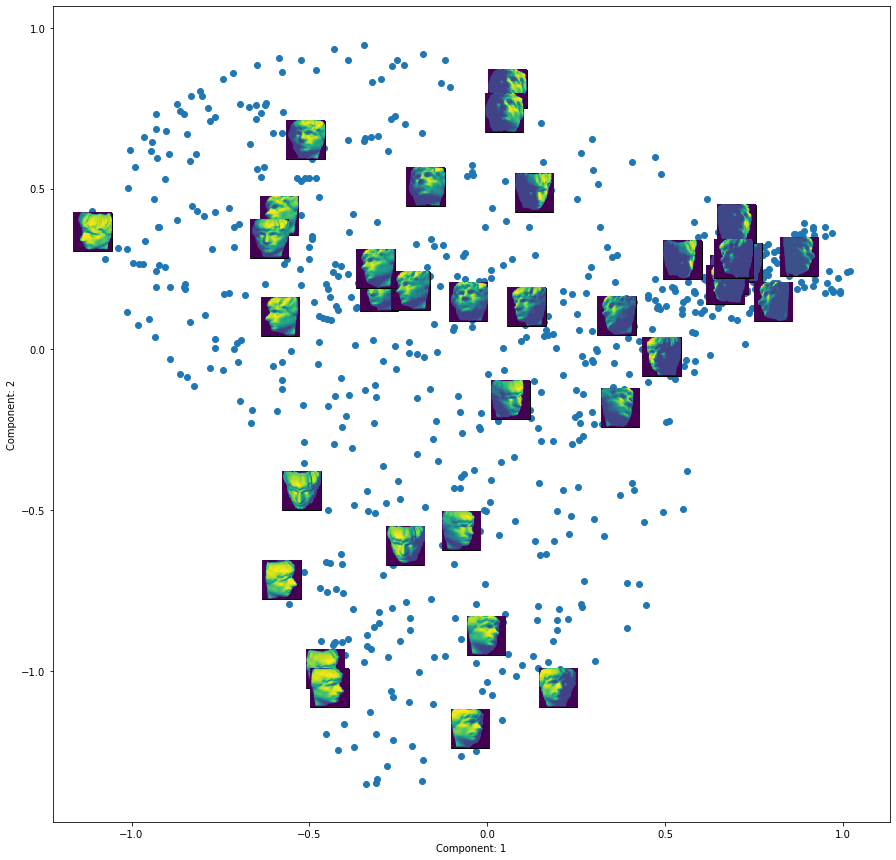

In [46]:
zs, w = pca(X, k=2)
plot_images(images, zs, saveas='data/HW2_Q2d.png')

# Question 3: Eigenfaces and simple face recognition

## 1. Perform analysis on the Yale face dataset for Subject 1 and Subject 2

In [47]:
def read_img(path, downsample=4):
    """
    Read image and store it as an array, given the image path.
    Returns the 3 dimensional image array.
    """
    img = Image.open(path)
    w, h = img.size
    img = img.resize((int(w/4), int(h/4)), resample=Image.BICUBIC)
    img_arr = np.array(img, dtype='uint32')
    img.close()
    return img_arr


In [48]:
face_files = glob.glob('data/yalefaces/*')
face_files.sort()
s1_files = [file for file in face_files if 'subject01' in file]
s2_files = [file for file in face_files if 'subject02' in file]
s1_images = []
s2_images = []

for fn in s1_files:
    if 'test' not in fn:
        image = read_img(fn)
        w, h = image.shape
        X = image.reshape((w * h))
        s1_images.append(X)

for fn in s2_files:
    if 'test' not in fn:
        image = read_img(fn)
        w, h = image.shape
        X = image.reshape((w * h))
        s2_images.append(X)

s1_images = np.array(s1_images)
s2_images = np.array(s2_images)

k = 6
zs1, ws1 = pca(s1_images, k=k)
zs2, ws2 = pca(s2_images, k=k)

e1 = ws1.T
e2 = ws2.T

### Subject 1 Eigenfaces

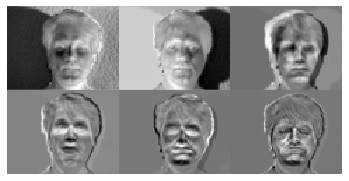

In [49]:
fig = plt.figure()
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0)

for i in range(k):
    img = ws1[:, i].reshape(w, h)
    grid[i].imshow(img,
        interpolation='nearest',
        cmap=plt.get_cmap('gray'))
    grid[i].axis('off')
    grid[i].set_xticks([])
    grid[i].set_yticks([])
plt.savefig('data/HW2_Q3.1a.png') 

### Subject 2 Eigenfaces

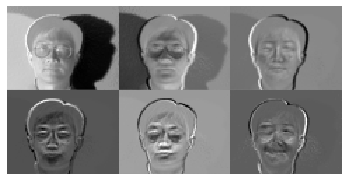

In [50]:
fig = plt.figure()
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0)

for i in range(k):
    img = ws2[:, i].reshape(w, h)
    grid[i].imshow(img,
        interpolation='nearest',
        cmap=plt.get_cmap('gray'))
    grid[i].axis('off')
    grid[i].set_xticks([])
    grid[i].set_yticks([])
plt.savefig('data/HW2_Q3.1b.png') 

## 2. Now we will perform a simple face recognition task.

In [51]:
for fn in s1_files:
    if 'test'  in fn:
        image = read_img(fn)
        w, h = image.shape
        s1_test = image.reshape((w * h))

for fn in s2_files:
    if 'test'  in fn:
        image = read_img(fn)
        w, h = image.shape
        s2_test = image.reshape((w * h))
s1_test = np.array(s1_test)
s1_test = np.reshape(s1_test,(s1_test.size, 1))
s2_test = np.array(s2_test)
s2_test = np.reshape(s2_test,(s2_test.size, 1))

In [52]:
similarity = []
similarity.append(np.abs(np.dot(ws1[:,0].T, s1_test)/(norm(ws1[:,0]) * norm(s1_test)))[0])
similarity.append(np.abs(np.dot(ws1[:,0].T, s2_test)/(norm(ws1[:,0]) * norm(s2_test)))[0])
similarity.append(np.abs(np.dot(ws2[:,0].T, s1_test)/(norm(ws2[:,0]) * norm(s1_test)))[0])
similarity.append(np.abs(np.dot(ws2[:,0].T, s2_test)/(norm(ws2[:,0]) * norm(s2_test)))[0])
similarity                                                                             

[0.876497361732054,
 0.6989403326054409,
 0.09381318208619374,
 0.41814881581859936]